# Plot of Szenarios

In [1]:
%load_ext autoreload
%autoreload 2
import json
from CSIKit.reader import IWLBeamformReader
from CSIKit.visualization.graph import *
from CSIKit.visualization.metric import *
from CSIKit.visualization.plot_szenario import *


# Define PlotClasses for each szenario 

In [9]:



PLOT_CLASSES =[
    (RSSI,                  PlotCandle),
    (RSSI_PerAntenna,       PlotCandleTuple),
    (Noise,                 PlotCandle),
    (RSSI,                  PlotBox),
    (SNR,                   PlotCandle),
    (Amplitude_Sum,         PlotCandle),
    (Phase_Diff_Stability,  PlotCandleTuple_Phase),
    (Datarate,              PlotCandle),
    (AGC,                   PlotCandle),
]


## Plot different graphes with the same entry source

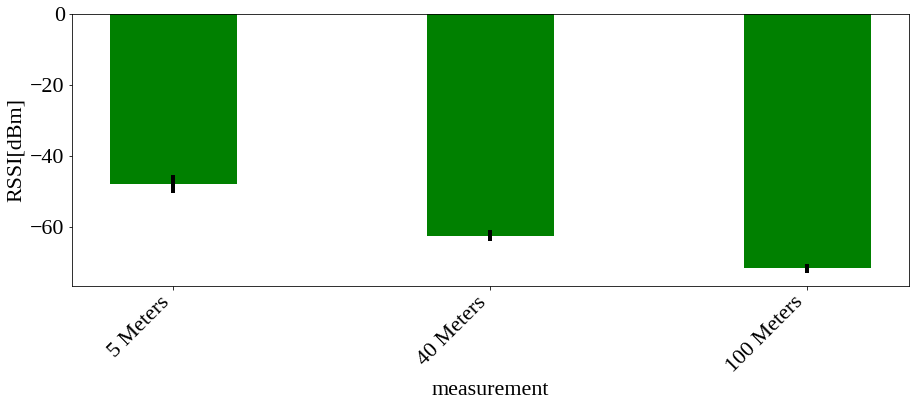

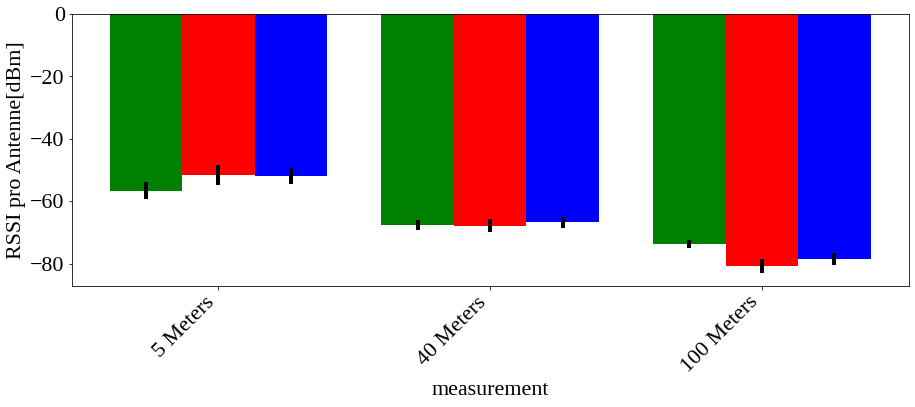

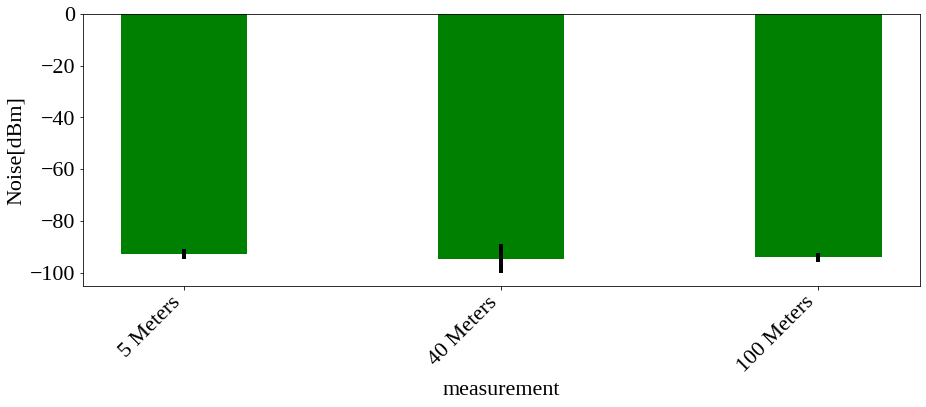

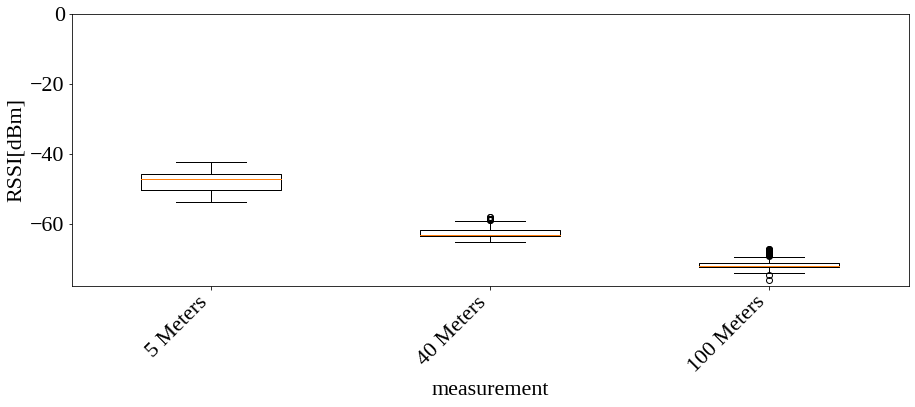

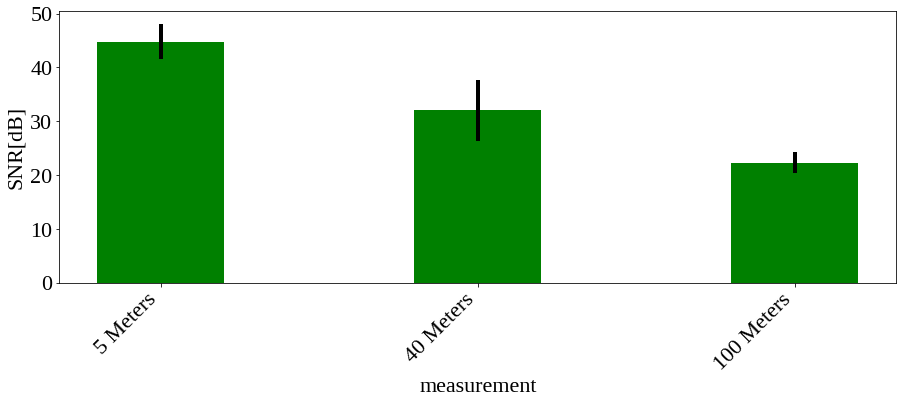

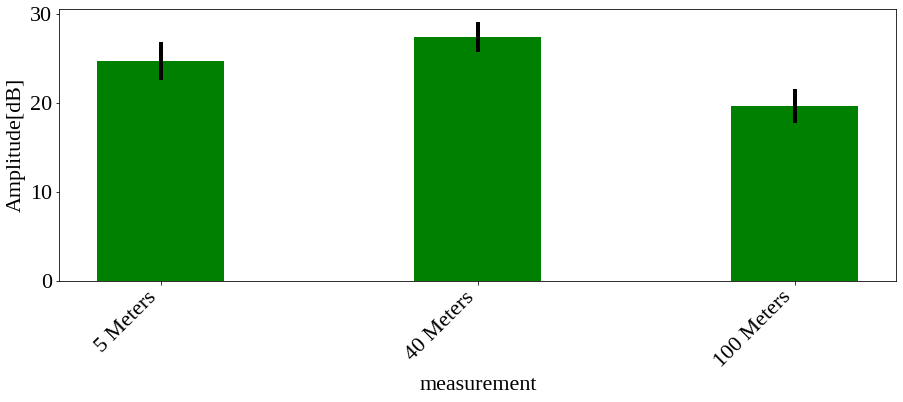

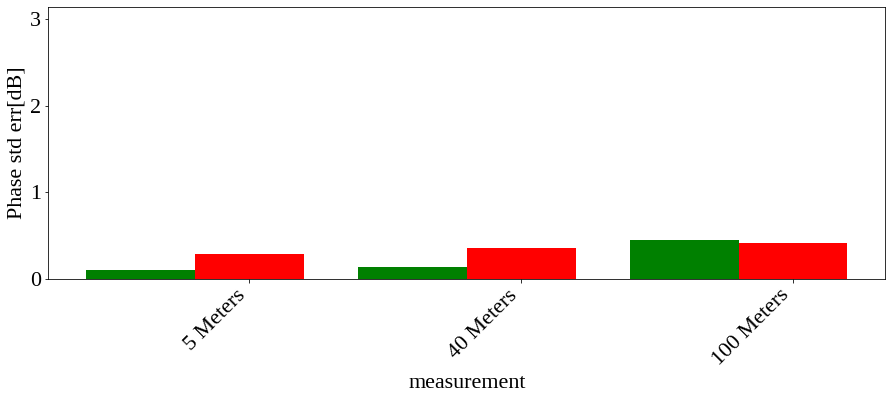

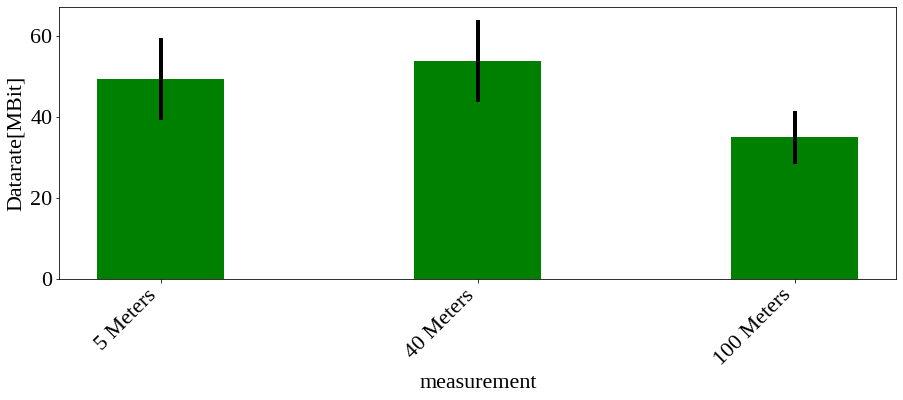

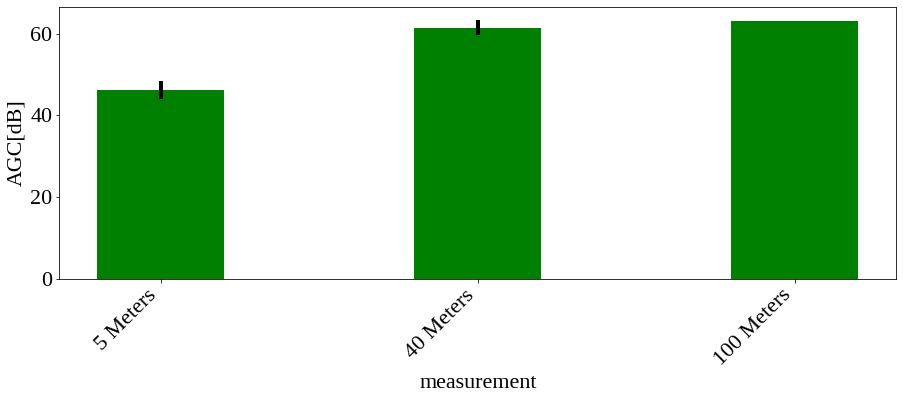

In [10]:
FILES = {
    "5 Meters"      :"./CSIKit/visualization/example_dat/los_5.dat",
    "40 Meters"     :"./CSIKit/visualization/example_dat/los_40.dat",
    "100 Meters"    :"./CSIKit/visualization/example_dat/los_100.dat",
}

#PLOT_CLASSES = [(RSSI, PlotCandle),(AGC, PlotCandle),(RSSI, PlotBox)]

szenario = SzenarioPlotter("name_to_save_pdf", PLOT_CLASSES)
szenario.add_measurements_files(FILES)
szenario.show()

## Save plots as PDf

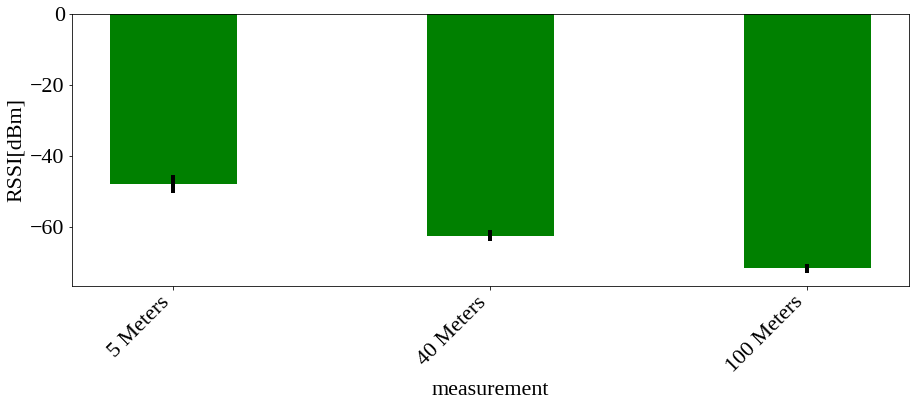

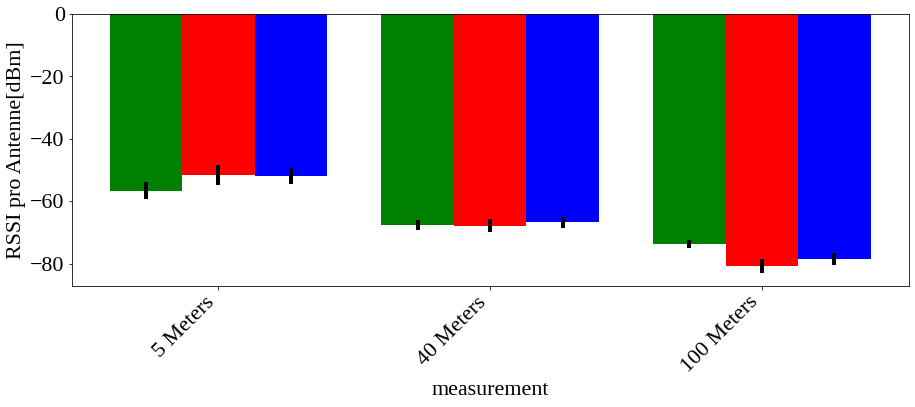

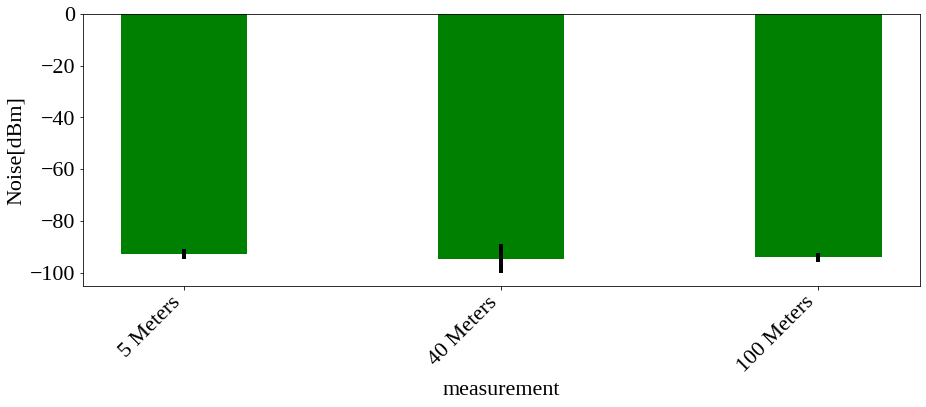

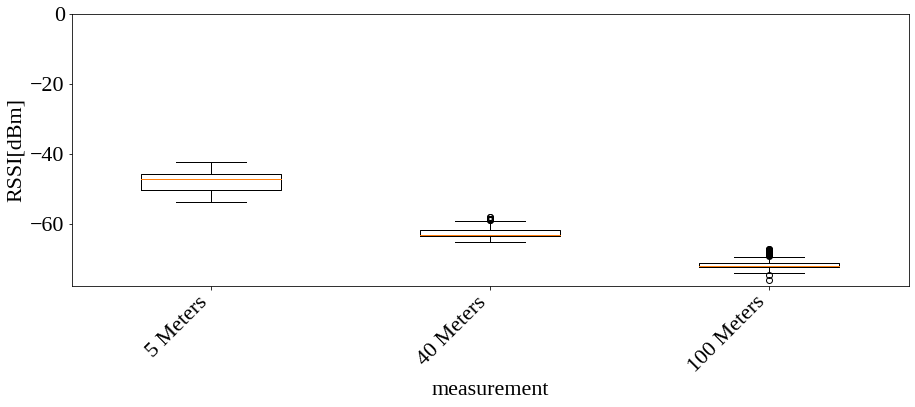

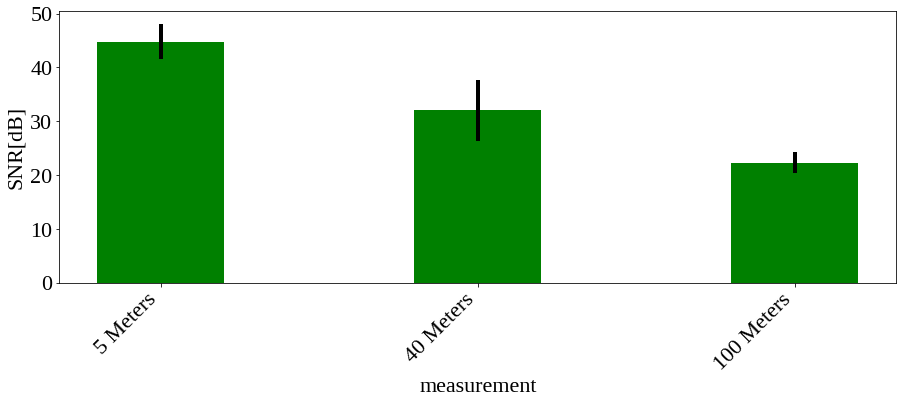

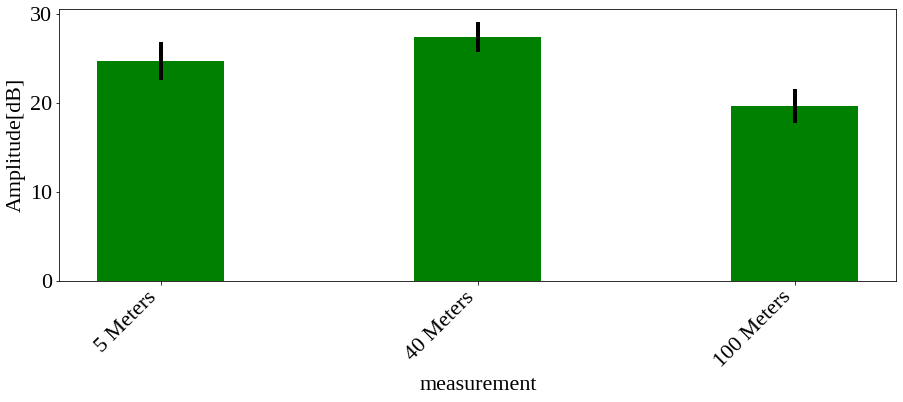

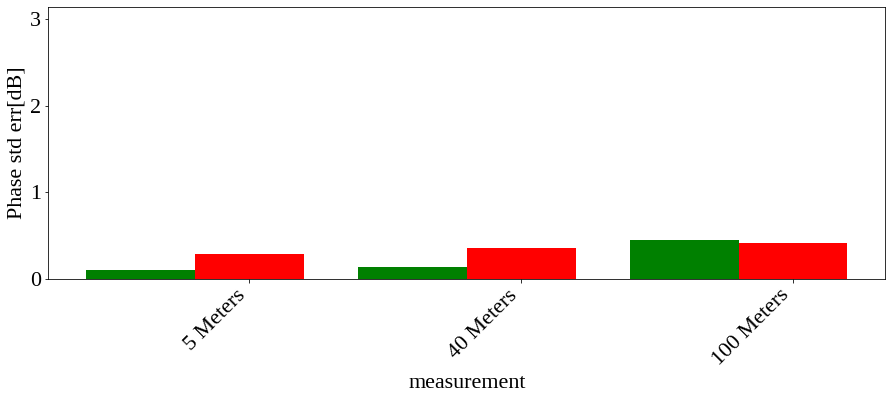

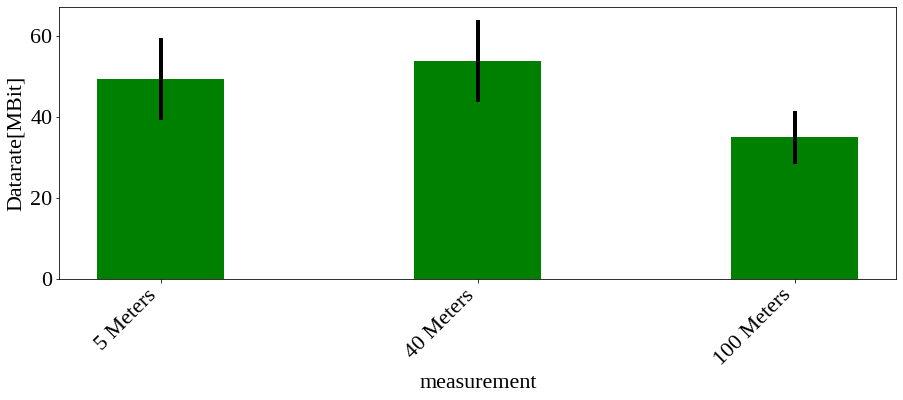

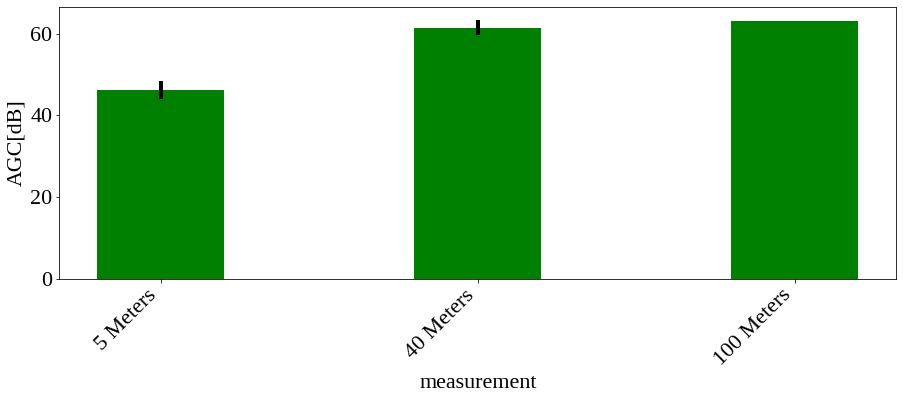

In [13]:
szenario.save(folder="your_wish_folder")

## Write own Metric

In [ ]:


class Noise(Metric):
    def notice(self, entry:CsiEntry):
        return entry.noise
    def get_name(self):
        return "Noise"
    def get_unit(self):
        return "dBm"



## Write own Graph
to implement your own graph, implement the show method at Graph and use the given matplotlib **axes** and values with the shape of 
``` python
{
    "<measurement_name1>" : entires:list[Frames],
    "<measurement_name2>" : entires:list[Frames],
    (...)
}
```
Following the implementation of PlotBox

In [ ]:
class PlotBox(Graph):
    @classmethod
    def show(cls, axes, values_per_measurement):

        data = list(values_per_measurement.values())
        labels = list(values_per_measurement.keys())

        if all(isinstance(k, int) for k in labels):  # if name is metric
            width = max(list(values_per_measurement.keys())) / \
                (2*len(list(values_per_measurement.keys())))
            axes.boxplot(data, positions=labels, labels=labels,  widths=width)

        else:
            width = 0.5
            axes.boxplot(data, labels=labels, widths=width)

            ind = np.arange(1, len(values_per_measurement)+1)
            axes.set_xticks(ind)
            axes.set_xticklabels(
                tuple(values_per_measurement.keys()), rotation=45, ha="right")
        mini = min({min(ar) for ar in data})
        maxi = max({max(ar) for ar in data})
        if maxi > 0 and mini > 0:
            axes.set_ylim(bottom=0)

        elif maxi < 0 and mini < 0:
            axes.set_ylim(top=0)